## Visualization with Seaborn

**Here we want to highlight why tidy data is useful for exploratory analysis**

- Visualizing individuals, distributions or aggregations of numerical measures
- Splitting by categorical variables
    - separating subsets spatially along an axis, 
    - distinguishing by color,
    - or making separate plots in columns or rows

Documentation: [https://seaborn.pydata.org/api.html]()

Tips data set: [https://github.com/mwaskom/seaborn-data/blob/master/tips.csv]()
This is a really nice data set for exploring differences between numerical values and distributions across a population distinguished by lots of categorical variables.

*Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing*

In [1]:
import seaborn as sns
sns.set_style("whitegrid")

tips = sns.load_dataset("tips")

tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### Individual variables & distributions

The most basic form of exploration is to visualize the distribution of values in numerical columns. A histogram is the most classic, but there are some nice alternatives for smaller data sets.

#### Histogram

"This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data."

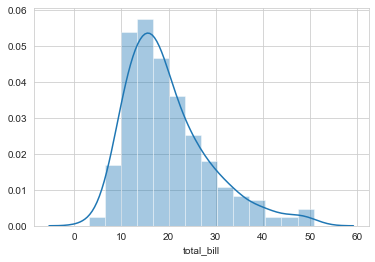

In [2]:
ax = sns.distplot(tips.total_bill)

You can turn on and off various aspects, and easily control how many bins are used.

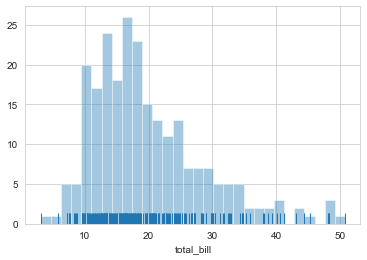

In [3]:
ax = sns.distplot(tips.total_bill, bins=30, kde=False, rug=True)

Since `distplot()` is a convenience combination of a histogram, `kdeplot()`, and `rugplot()`, they include a way to pass extra keyword arguments to the internal functions, like for controlling the bandwidth (bw) of the kde plot.

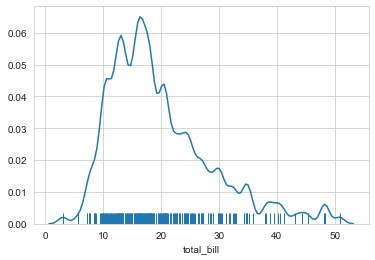

In [4]:
ax = sns.distplot(tips.total_bill, hist=False, rug=True, kde_kws={'bw':0.8})

#### Strip plot

You notice that the rug plot shows all individuals, but it's hard without the histogram or kde to tell how many points are overlapping. One solution is to "jitter" the points randomly along the categorical axis with `stripplot()`.

This doesn't scale very well to huge datasets, but with small data it's nice to see each individual point as a mark.

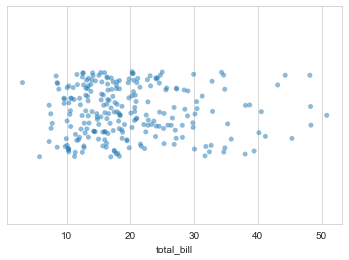

In [5]:
ax =  sns.stripplot(x='total_bill', data=tips, alpha=0.5, jitter=0.2)

#### Swarm plot 

Jitter doesn't get rid of all overlap, though, so an interesting alternative to `stripplot()` is a `swarmplot()`. Points are stacked at their data value.

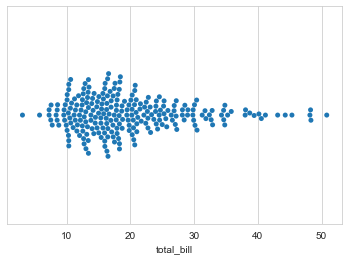

In [6]:
ax = sns.swarmplot(x="total_bill", data=tips)

### Splitting by a categorical variable

Now we can start seeing the power of splitting / subsetting the data (in space and/or color) by the values of a categorial variable.

Here we split both in space, by "day", and in hue (color) by "sex".

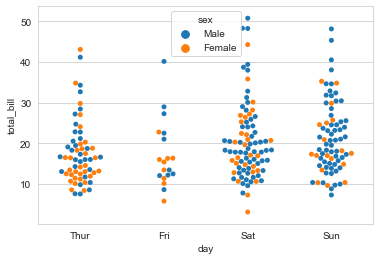

In [7]:
ax = sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

The violin plot itself can be "split" by a variable.

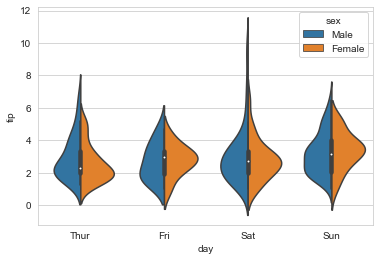

In [8]:
ax = sns.violinplot(x="day", y="tip", hue="sex", split=True, data=tips)

You can even superimpose plots by putting them on the same "axis".

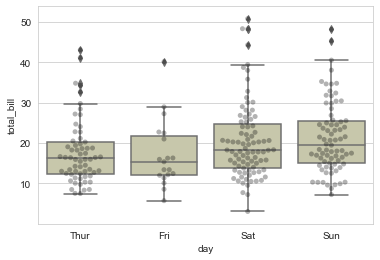

In [9]:
ax = sns.boxplot(x="day", y="total_bill", color=(0.8, 0.8, 0.65, 0.5), data=tips)
ax = sns.swarmplot(x="day", y="total_bill", color='black', alpha=0.3, data=tips)

### Catplot for drawing categorical plots onto a (facet)grid

Shows the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying function to use:

Categorical scatterplots:
- stripplot() (with kind="strip"; the default)
- swarmplot() (with kind="swarm")

Categorical distribution plots:
- boxplot() (with kind="box")
- violinplot() (with kind="violin")
- boxenplot() (with kind="boxen")

Categorical estimate plots:
- pointplot() (with kind="point")
- barplot() (with kind="bar")
- countplot() (with kind="count")

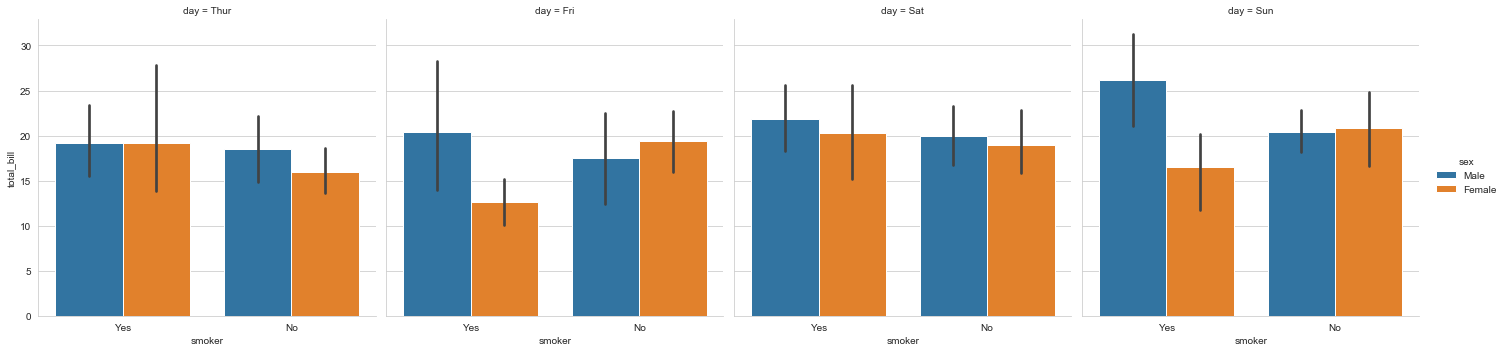

In [10]:
g = sns.catplot(x="smoker", y="total_bill",
                    hue="sex", col="day",
                    data=tips, kind="bar");

### pointplot() – point estimates and confidence intervals

"A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars."

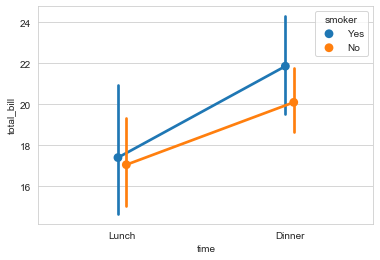

In [11]:
ax = sns.pointplot(x="time", y="total_bill", hue="smoker",
                    data=tips, dodge=True)

### Joint plot (bivariate distributions)

"It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the `jointplot()` function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes."

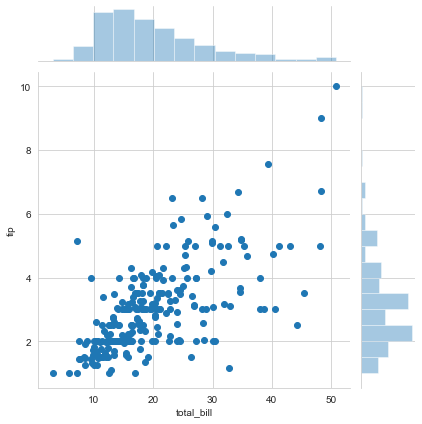

In [12]:
g = sns.jointplot(x="total_bill", y="tip", data=tips)

When there is a lot of overlap, it can be helpful to show a heatmap rather than individual points. **(Unfortunately, this doesn't produce a color legend!!)**

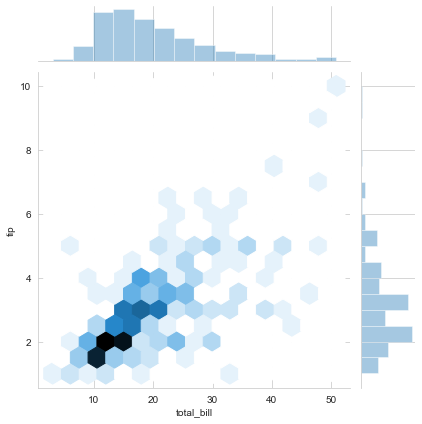

In [13]:
g = sns.jointplot("total_bill", "tip", data=tips, kind="hex", stat_func=None, )

### Regression models

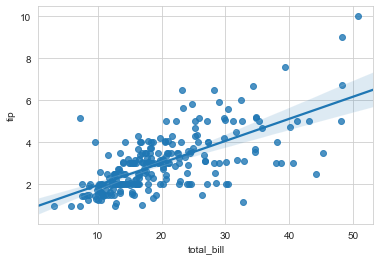

In [14]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

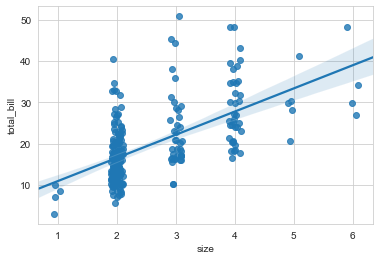

In [15]:
ax = sns.regplot(x="size", y="total_bill", data=tips, x_jitter=.1)

### lmplot() – Plot data and regression model fits across a FacetGrid.

This function combines `regplot()` and `FacetGrid`. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

When thinking about how to assign variables to different facets, a general rule is that it makes sense to use hue for the most important comparison, followed by col and row. However, always think about your particular dataset and the goals of the visualization you are creating.

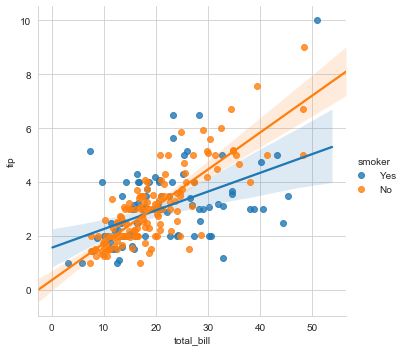

In [16]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

It's very convenient to be able to **wrap the columns after a certain count**

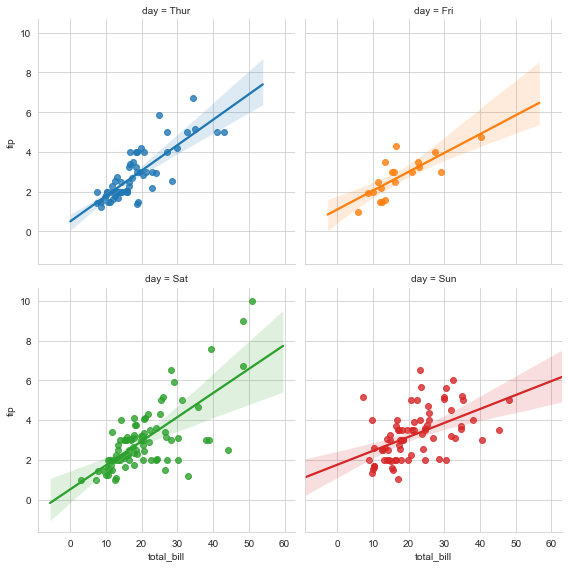

In [17]:
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
                data=tips, col_wrap=2, height=4)

### Pairwise comparisons

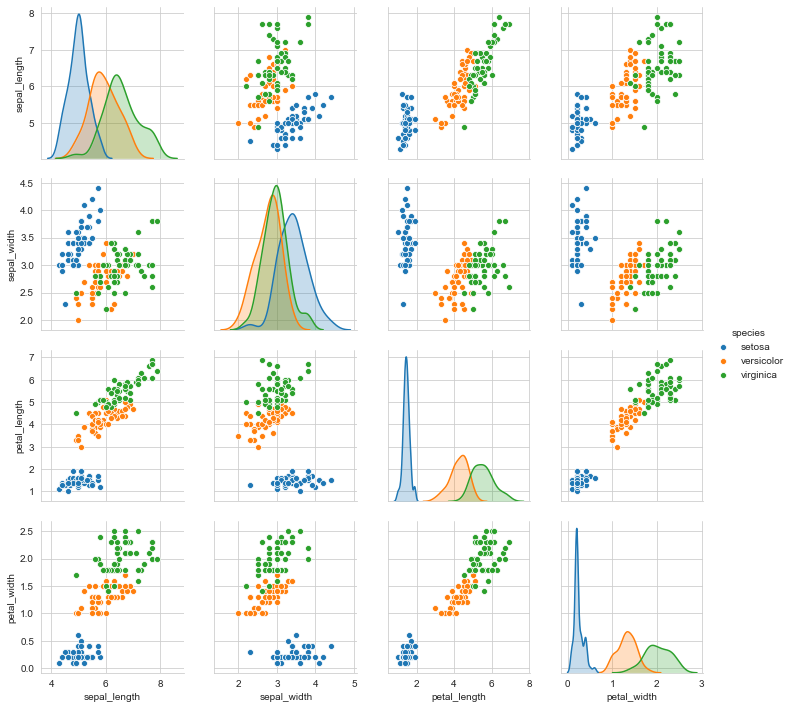

In [18]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species');